<a href="https://colab.research.google.com/github/kelmity/classicML/blob/main/homework_practice_02_linregr_shamaiaev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [ ]:
data_train = np.loadtxt('/content/train.txt', delimiter=',')
data_test = np.loadtxt('/content/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.


In [ ]:
def qqmse(pred, targ):
  mse = 0
  for i in range(0, len(pred)):
    mse += (pred[i] - targ[i]) ** 2

  return mse / len(pred)

def findA(X_train, y_train, b):
    y_train_mod = y_train - b * np.ones(len(y_train))
    temp_arg1 = np.dot(X_train.T, X_train)
    temp_arg2 = 1/(temp_arg1)
    temp_arg3 = np.dot(temp_arg2, X_train.T)
    a = np.dot(temp_arg3, y_train_mod)

    return a


k = np.ones(len(X_test))
prev_mse = 10**100
prev_a = 0
prev_b = 0
status = 0
b_koef = len(str(y_train[0])) * 10 # (mse, b): (6.234829298520685, 10**6), (6.277150827864204, len(str(y_train[0])) * 2)
for j in range(0, b_koef + 1):
  mse = 0

  if j % (b_koef//10) == 0:
    print(status, "%", sep = "", end = " ")
    status += 10

  b = (j - b_koef // 2) / b_koef * 10
  a = findA(X_train, y_train, b)

  pred = X_train * a + b
  mse = qqmse(pred, y_train)

  if prev_mse > mse:
    prev_mse = mse
    prev_a = a
    prev_b = b

print("")
print("")
print("b means count:", (0 - b_koef // 2) / b_koef * 10, "to", (b_koef - b_koef // 2) / b_koef * 10, "with step =", ((1 - b_koef // 2) / b_koef * 10) - ((0 - b_koef // 2) / b_koef * 10))
print("")
print("data train mse:", prev_mse, "a:", prev_a, "b:", prev_b)
print("")
print("data test mse:", qqmse(X_test * prev_a + prev_b, y_test))

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

b means count: -5.0 to 5.0 with step = 0.09999999999999964

data train mse: 0.2973958342309763 a: 2.324656285812133 b: 4.4

data test mse: 0.4288310592704396


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

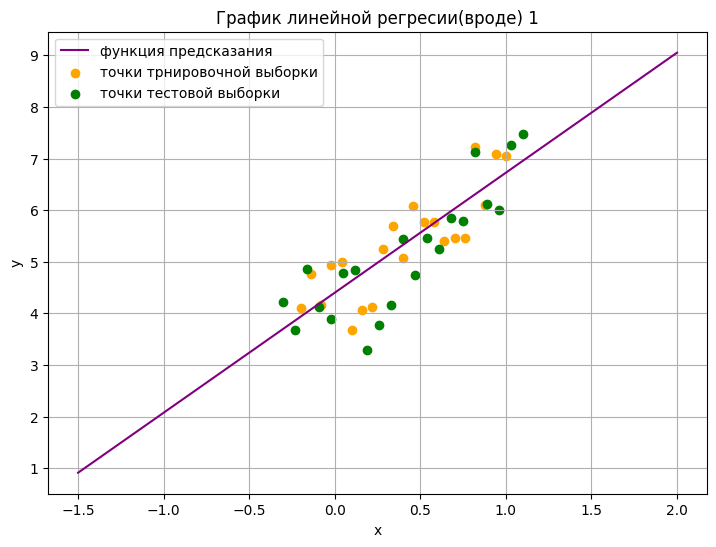

In [ ]:
def fstmodel(x, a, b):
  return x * a + b

x_values = np.linspace(-1.5, 2, 1000)

y_values = fstmodel(x_values, prev_a, prev_b)

plt.figure(figsize=(8.5 ,6))
plt.plot(x_values, y_values, color = "purple")
plt.scatter(X_train, y_train, color = "orange")
plt.scatter(X_test, y_test, color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("График линейной регресии(вроде) 1")
plt.grid(True)
plt.legend(["функция предсказания", "точки трнировочной выборки", "точки тестовой выборки"])
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
def findAAAA(X_train, y_train):
    y_train_mod = (y_train).reshape(len(y_train), 1)
    temp_arg1 = np.dot(X_train.T, X_train)
    temp_arg2 = np.linalg.inv(temp_arg1)
    temp_arg3 = np.dot(temp_arg2, X_train.T)
    a = np.dot(temp_arg3, y_train_mod)

    return a

def sndmodel(x, a, b):
  y = 0
  for i in range(1, b + 1):
    y += x**(i-1) * a[i-1]
  return y




best_mse = 10**100
best_a = 0
best_b = 0
stat = 10
b_kf = len(str(y_train[0])) * 10
print(0, "%", sep = "", end = " ")
new_X_train = np.ones(len(X_train)).reshape(len(X_train), 1)

for i in range(1, 11):
  new_X_train = new_X_train.T
  print(stat, "%", sep = "", end = " ")
  stat += 10
  new_X_train = np.concatenate((new_X_train, (new_X_train[i-1] * X_train.reshape(len(X_train), 1).T)), axis=0)

  new_X_train = new_X_train.T


  k = np.ones(len(X_test))
  mse2 = 0


  a = findAAAA(new_X_train, y_train)
  predict = 0
  new_X_train = new_X_train.T
  for q in range(0, i + 1):
    predict += new_X_train[q] * a[q]

  new_X_train = new_X_train.T
  mse2 = qqmse(predict, y_train)
  if best_mse > mse2:
    best_mse = mse2
    best_a = a
    best_b = b
    q_i = i

pred_test = 0
new_X_test = np.ones(len(X_train)).reshape(len(X_test), 1)
new_X_test = new_X_test.T
for i in range(1, 10):

  print(stat, "%", sep = "", end = " ")
  stat += 10
  new_X_test = np.concatenate((new_X_test, (new_X_test[i-1] * X_test.reshape(len(X_train), 1).T)), axis=0)

new_X_test = new_X_test.T

for q in range(0, q_i + 1):

      pred_test += new_X_test[q] * best_a[q]

i = 0
polynomial = []
print("")

expression = ""
for i, coef in enumerate(best_a):
    coef = coef[0]
    if coef != 0:
        if i == 0:
            expression += f"{coef} "
        else:
            exponent = str(i).translate(str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹"))
            expression += f"+ {coef}x{exponent} "

XXtr = new_X_train
YYtr = y_train
XXts = new_X_test
YYts = y_test

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 110% 120% 130% 140% 150% 160% 170% 180% 190% 


In [ ]:
print("Выбранный многочлен степени ", q_i, ": ", expression, sep="") #не придумал, как лучше вывести(
print("")
print("Ошиька на тесте:", qqmse(pred_test, y_test), "ошибка на трейне:", best_mse)

Выбранный многочлен степени 10: 4.669176001799037 + -2.15984761900272x¹ + -36.17544484844156x² + 44.93537042801023x³ + 1201.9541056926244x⁴ + -1660.8244236848002x⁵ + -12969.943513275291x⁶ + 46686.6787950172x⁷ + -63621.03298592924x⁸ + 40177.55352344249x⁹ + -9818.583940143577x¹⁰ 

Ошиька на тесте: 68.15545666445043 ошибка на трейне: 0.15316610999522892


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

10


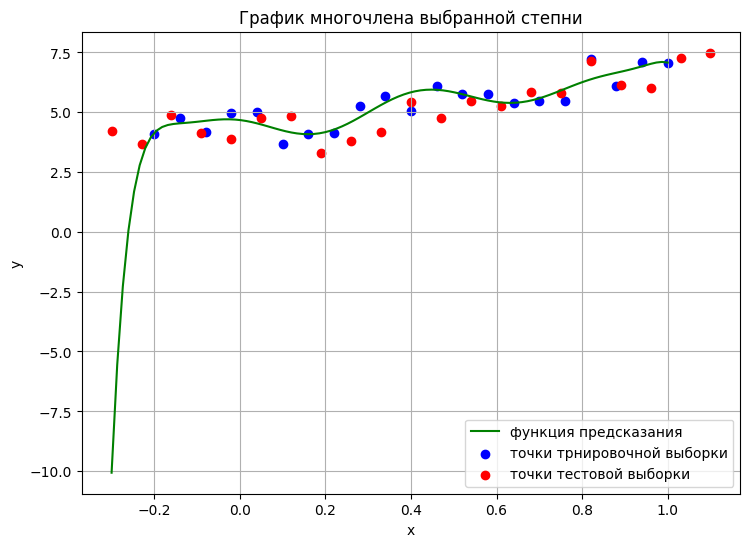

In [ ]:
x1_values = np.linspace(-0.3, 1, 100)

y1_values = sndmodel(x1_values, best_a, 11)

plt.figure(figsize=(8.5 ,6))
plt.plot(x1_values, y1_values, color = "green")
plt.scatter(X_train, y_train, color = "blue")
plt.scatter(X_test, y_test, color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("График многочлена выбранной степни")
plt.grid(True)
plt.legend(["функция предсказания", "точки трнировочной выборки", "точки тестовой выборки"], loc = "lower right")
print(q_i)
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
best_mse = 10**100
best_a = 0
best_b = 0
stat = 10
b_kf = len(str(y_train[0])) * 10
print(0, "%", sep = "", end = " ")
weights = []
new_X_train = np.ones(len(X_train)).reshape(len(X_train), 1)
for i in range(1, 11):
  new_X_train = new_X_train.T
  print(stat, "%", sep = "", end = " ")
  stat += 10
  new_X_train = np.concatenate((new_X_train, (new_X_train[i-1] * X_train.reshape(len(X_train), 1).T)), axis=0)

  new_X_train = new_X_train.T


  k = np.ones(len(X_test))
  mse2 = 0


  a = findAAAA(new_X_train, y_train)
  predict = 0
  new_X_train = new_X_train.T
  for q in range(0, i + 1):
    predict += new_X_train[q] * a[q]

  new_X_train = new_X_train.T
  mse2 = qqmse(predict, y_train)
  best_mse = mse2
  best_a = a
  best_b = b
  q_i = i

  new_X_test = new_X_test.T
  pred_test = 0
  for q in range(0, q_i + 1):

      pred_test += new_X_test[q] * best_a[q]

  i = 0

  print("")

  expression = ""
  for i, coef in enumerate(best_a):
      coef = coef[0]
      if coef != 0:
          if i == 0:
              expression += f"{coef} "
          else:
              exponent = str(i).translate(str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹"))
              expression += f"+ {coef}x{exponent} "

  weights.append(best_a)
  print("Выбранный многочлен степени ", q_i, ": ", expression, sep="") #не придумал, как лучше вывести(
  print("")
  print("Ошиька на тесте:", qqmse(pred_test, y_test), "ошибка на трейне:", best_mse)

0% 10% 
Выбранный многочлен степени 1: 4.433230905064936 + 2.2791344980519463x¹ 

Ошиька на тесте: 0.4351202004048882 ошибка на трейне: 0.2968966332625196
20% 
Выбранный многочлен степени 2: 4.472476503404162 + 1.1578316883597326x¹ + 1.4016285121152783x² 

Ошиька на тесте: 17.91691477667946 ошибка на трейне: 0.2696989158766915
30% 
Выбранный многочлен степени 3: 4.460736355285052 + 1.065016105285346x¹ + 1.8597508372607054x² + -0.3817686042880092x³ 

Ошиька на тесте: 0.3553464571518199 ошибка на трейне: 0.269497187147961
40% 
Выбранный многочлен степени 4: 4.341166120399795 + 1.1718023926381476x¹ + 6.794091784349706x² + -13.051328119982772x³ + 7.918474697308952x⁴ 

Ошиька на тесте: 17.77887877229673 ошибка на трейне: 0.2610665330579275
50% 
Выбранный многочлен степени 5: 4.431297813829428 + -0.13059803992642904x¹ + 3.2747144018120276x² + 21.374796276309237x³ + -51.13148138541717x⁴ + 29.524978041339917x⁵ 

Ошиька на тесте: 0.557973202157689 ошибка на трейне: 0.2499850464831756
60% 
Выбра

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [ ]:
best_mse = 10**100
best_a = 0
best_b = 0
stat = 10
b_kf = len(str(y_train[0])) * 10
print("Strart... ")
new_X_train = np.ones(len(X_train)).reshape(len(X_train), 1)
for i in range(1, 11):
  new_X_train = new_X_train.T
  stat += 10
  new_X_train = np.concatenate((new_X_train, (new_X_train[i-1] * X_train.reshape(len(X_train), 1).T)), axis=0)

  new_X_train = new_X_train.T


  k = np.ones(len(X_test))
  mse2 = 0


  a = findAAAA(new_X_train, y_train)
  predict = 0
  new_X_train = new_X_train.T
  for q in range(0, i + 1):
    predict += new_X_train[q] * a[q]

  new_X_train = new_X_train.T
  mse2 = qqmse(predict, y_train)
  best_mse = mse2
  best_a = a
  best_b = b
  q_i = i

  new_X_test = new_X_test.T
  pred_test = 0
  for q in range(0, q_i + 1):

      pred_test += new_X_test[q] * best_a[q]

  print("")
  print("Для степени:", i, "Ошибка на тесте:", qqmse(pred_test, y_test), "Ошибка на трейне:", best_mse)

Strart... 

Для степени: 1 Ошибка на тесте: 0.4351202004048882 Ошибка на трейне: 0.2968966332625196

Для степени: 2 Ошибка на тесте: 17.91691477667946 Ошибка на трейне: 0.2696989158766915

Для степени: 3 Ошибка на тесте: 0.3553464571518199 Ошибка на трейне: 0.269497187147961

Для степени: 4 Ошибка на тесте: 17.77887877229673 Ошибка на трейне: 0.2610665330579275

Для степени: 5 Ошибка на тесте: 0.557973202157689 Ошибка на трейне: 0.2499850464831756

Для степени: 6 Ошибка на тесте: 20.219189871235777 Ошибка на трейне: 0.18829348988369932

Для степени: 7 Ошибка на тесте: 2.515782903787455 Ошибка на трейне: 0.18539621153294436

Для степени: 8 Ошибка на тесте: 12.530664914646295 Ошибка на трейне: 0.15905556579090113

Для степени: 9 Ошибка на тесте: 4.776337672940464 Ошибка на трейне: 0.15847184274741316

Для степени: 10 Ошибка на тесте: 68.15545666445043 Ошибка на трейне: 0.15316610999522892


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

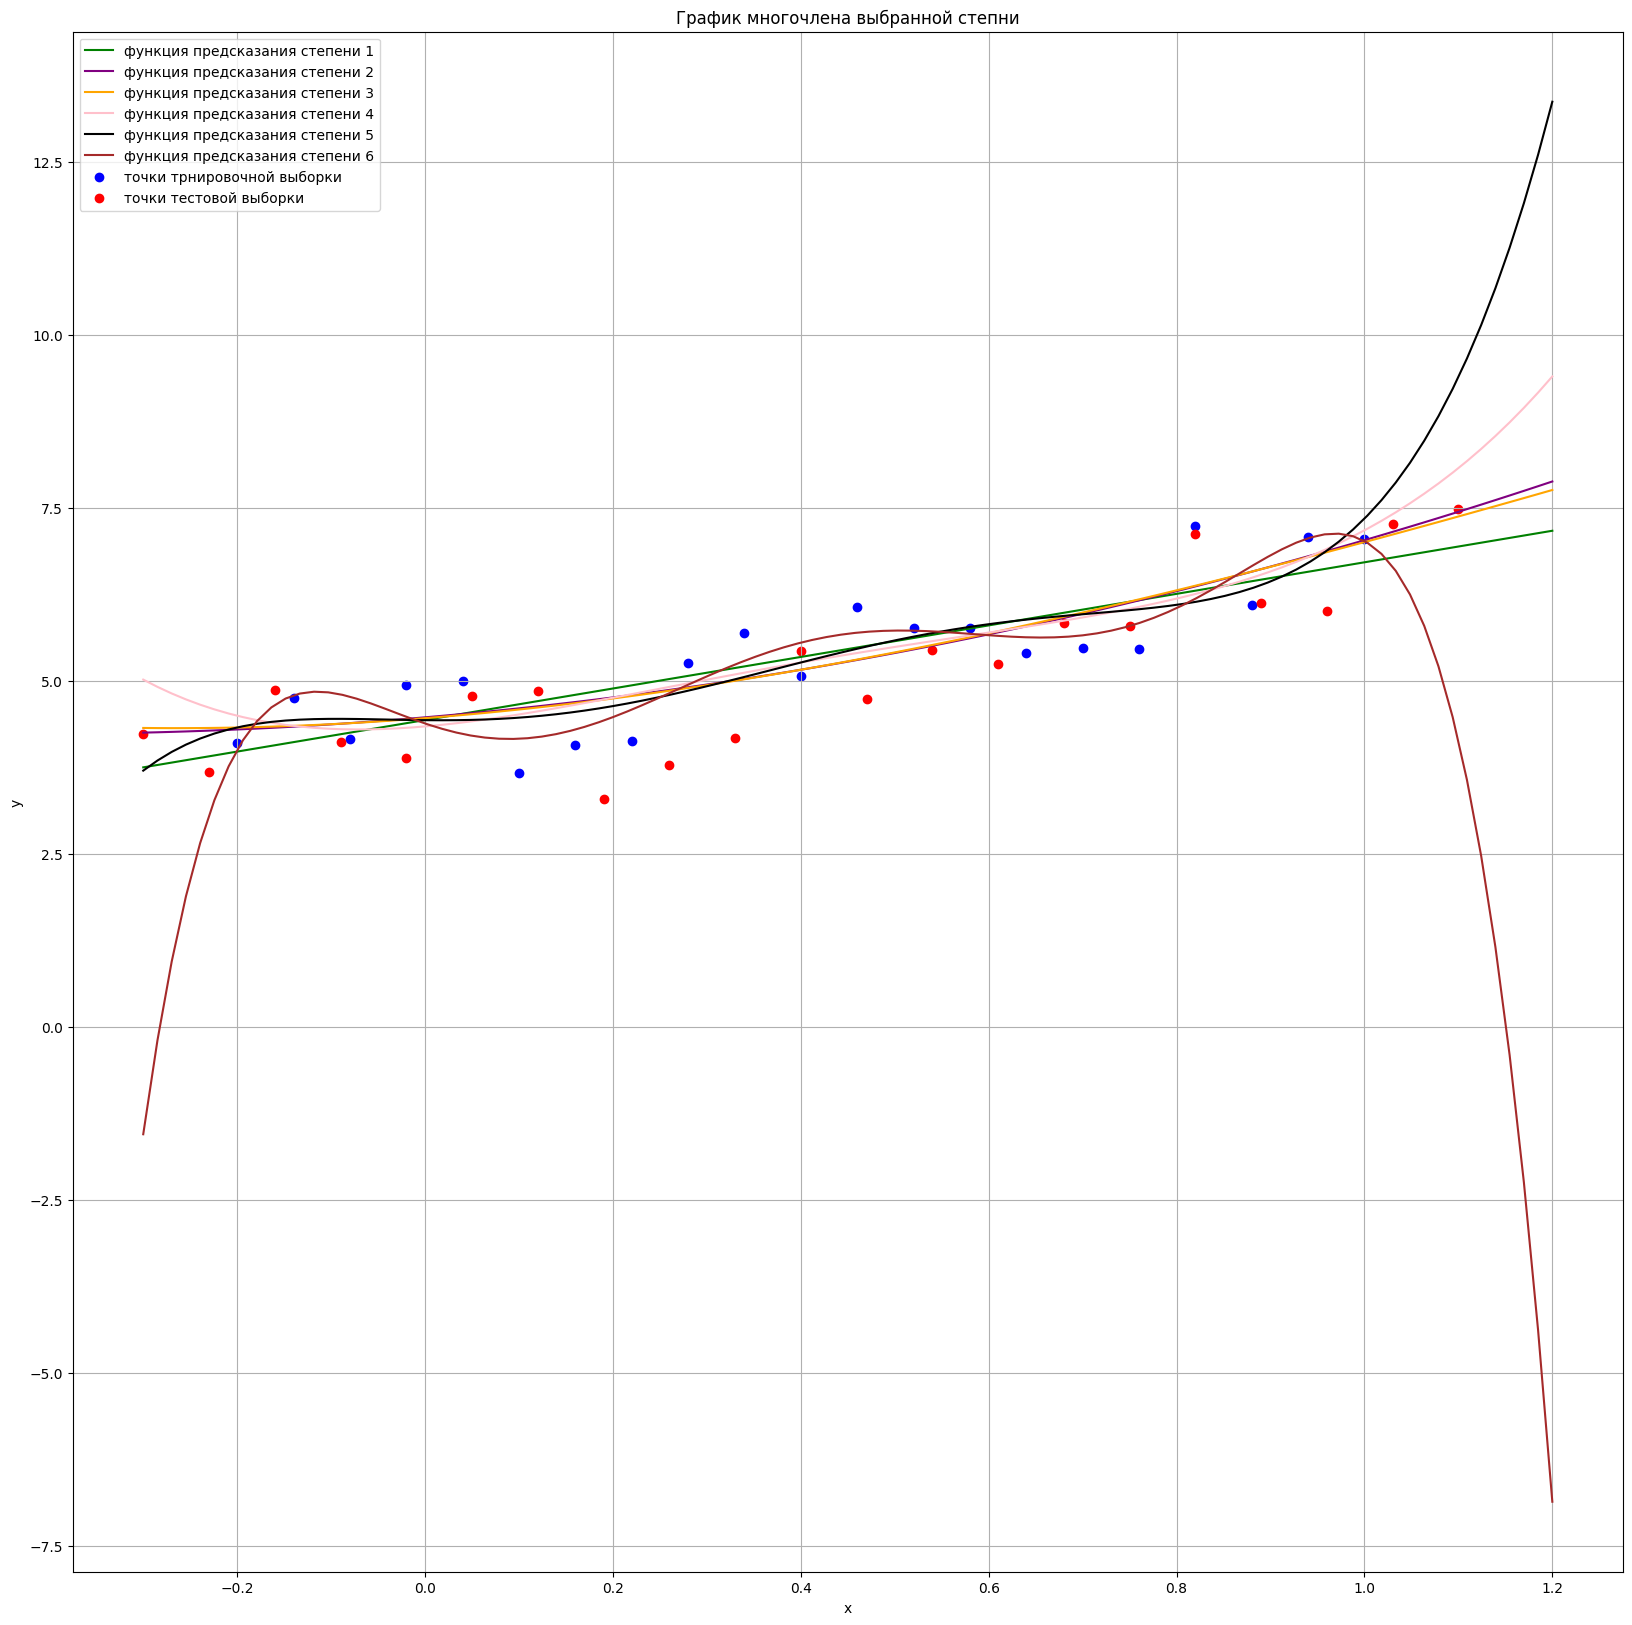

In [ ]:
x1_values = np.linspace(-0.3, 1.2, 100)

y1_values = sndmodel(x1_values, weights[0], 2)
y2_values = sndmodel(x1_values, weights[1], 3)
y3_values = sndmodel(x1_values, weights[2], 4)
y4_values = sndmodel(x1_values, weights[3], 5)
y5_values = sndmodel(x1_values, weights[4], 6)
y6_values = sndmodel(x1_values, weights[5], 7)
y7_values = sndmodel(x1_values, weights[6], 8)

plt.figure(figsize=(20 ,20))
plt.plot(x1_values, y1_values, color = "green")
plt.plot(x1_values, y2_values, color = "purple")
plt.plot(x1_values, y3_values, color = "orange")
plt.plot(x1_values, y4_values, color = "pink")
plt.plot(x1_values, y5_values, color = "black")
plt.plot(x1_values, y6_values, color = "brown")
plt.scatter(X_train, y_train, color = "blue")
plt.scatter(X_test, y_test, color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("График многочлена выбранной степни")
plt.grid(True)
plt.legend(["функция предсказания степени 1", "функция предсказания степени 2", "функция предсказания степени 3", "функция предсказания степени 4", "функция предсказания степени 5", "функция предсказания степени 6", "точки трнировочной выборки", "точки тестовой выборки"], loc = "upper left")
plt.show() #я блин цветов столько не знаю...()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

8. Это не круто (почти точно), называетс переобучением, когда моделька слишком сильно подстраивается под данные и вместо нахождения скрытой зависимости пытается получить таргетные значения

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/flats_moscow_mod.txt", sep = "\t")

In [ ]:
data.iloc[355], data["price"].mean()

(price       95.0
 totsp       62.0
 livesp      43.0
 kitsp        7.0
 dist        12.0
 metrdist     7.0
 Name: 355, dtype: float64,
 126.79150326797385)

In [ ]:
target = data.columns[0]
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis = 1), data[target], test_size=0.3, random_state=7)

In [ ]:
X_test, y_test

(      totsp  livesp  kitsp  dist  metrdist
 294      51      35      6  12.5         5
 553      80      43     10  12.0        15
 1289     85      52     10  12.0        10
 43       76      45     10  12.0        15
 568      78      45     11  13.0        10
 ...     ...     ...    ...   ...       ...
 153      77      47     10  13.5        10
 237      63      38      9  12.5        10
 54       55      39      6   8.0        10
 394      86      50     10  13.5        10
 123      70      40      9  15.5        10
 
 [459 rows x 5 columns],
 294      82
 553     110
 1289    115
 43      114
 568     117
        ... 
 153     135
 237     103
 54       93
 394     138
 123     135
 Name: price, Length: 459, dtype: int64)

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
def model(X, target_means):
  try:
    target_means = target_means.to_numpy()
    X = X.to_numpy()
  except:
    pass

  X = np.concatenate((np.ones(len(X)).reshape(len(X), 1), X), axis=1)
  temp_arg1 = np.dot(X.T, X)
  temp_arg2 = np.linalg.inv(temp_arg1)
  temp_arg3 = np.dot(temp_arg2, X.T)
  a = np.dot(temp_arg3, target_means)

  return a

a = model(X_train, y_train)

In [ ]:
sum(X_test.iloc[0] * a[1:]) + a[0], y_train.iloc[0]

(70.23670471767994, 95)

In [ ]:
a #0 - свободный кф, а дальше слева направо общая площадь, те хен, ням ням, ниф ниф и наф наф

array([-21.9869783 ,   1.82448188,   1.26175058,   0.48342489,
        -3.31041448,  -1.3013063 ])

**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Нуууу далеко жить от метро или центра тяжко, воот поэтому, в двух последних колонках минусики, так как увеличение растояния до метро плохо сказывается на цену квартиры и психическое здоровье. (последнеее не точно)

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
def msqe(X, a, true_value):
  mse = 0
  for i in range(0, len(X)):
    mse += (sum(X.iloc[i] * a[1:]) + a[0] - true_value.iloc[i])**2

  return mse / len(X)

msqe(X_test, a, y_test)

715.0364050508014

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

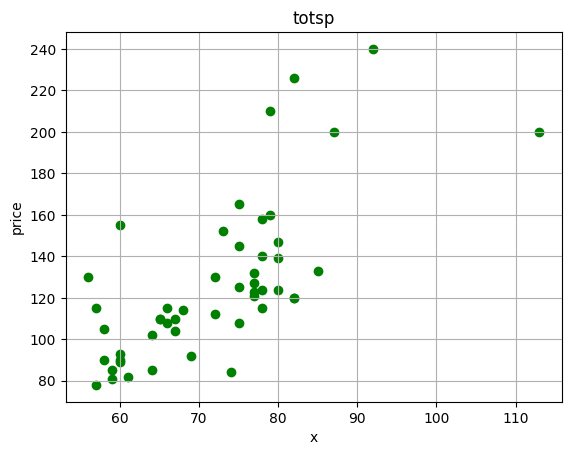

In [ ]:
selection_data = data.sample(50)
plt.scatter(selection_data["totsp"], selection_data["price"], color = "green")
plt.xlabel("x")
plt.ylabel("price")*
plt.title("totsp")
plt.grid(True)
plt.show() #я блин цветов столько не знаю...()

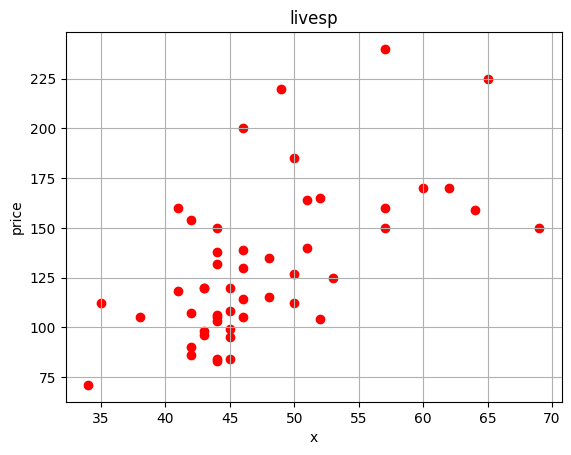

In [ ]:
selection_data = data.sample(50)
plt.scatter(selection_data["livesp"], selection_data["price"], color = "red")
plt.xlabel("x")
plt.ylabel("price")
plt.title("livesp")
plt.grid(True)
plt.show() #я блин цветов столько не знаю...()

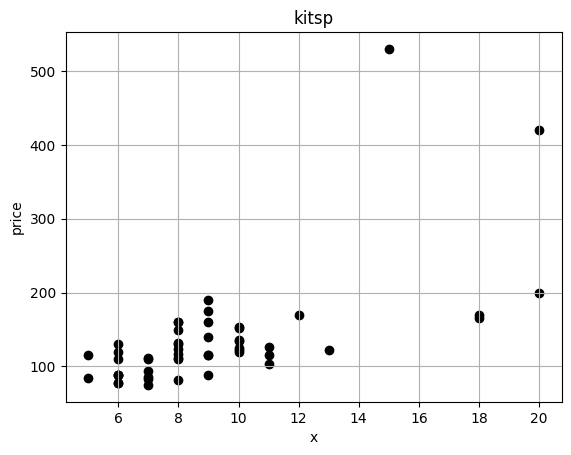

In [ ]:
selection_data = data.sample(50)
plt.scatter(selection_data["kitsp"], selection_data["price"], color = "black")
plt.xlabel("x")
plt.ylabel("price")
plt.title("kitsp")
plt.grid(True)
plt.show() #я блин цветов столько не знаю...()

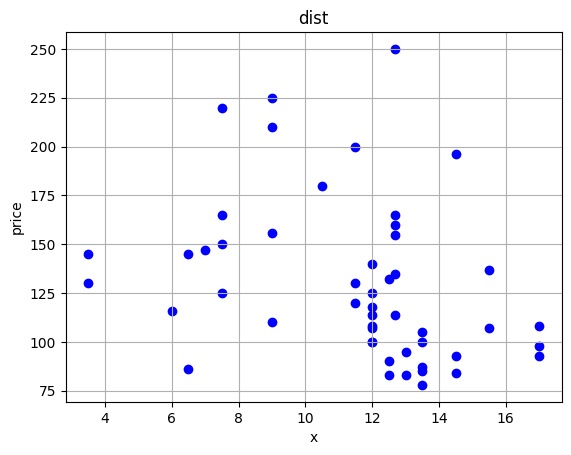

In [ ]:
selection_data = data.sample(50)
plt.scatter(selection_data["dist"], selection_data["price"], color = "blue")
plt.xlabel("x")
plt.ylabel("price")
plt.title("dist")
plt.grid(True)
plt.show() #я блин цветов столько не знаю...()

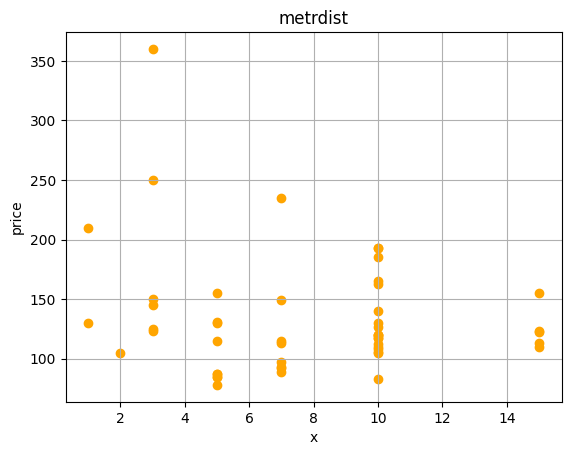

In [ ]:
selection_data = data.sample(50)
plt.scatter(selection_data["metrdist"], selection_data["price"], color = "orange")
plt.xlabel("x")
plt.ylabel("price")
plt.title("metrdist")
plt.grid(True)
plt.show() #я блин цветов столько не знаю...()

Ну если прям често, после графикоф, я не то чтобы увидел что-то похожее на ln или sq, так что возьму какое-нибудь отношениею. Например Дистанцияот центра на дистанцию метро, потому что людям в центре может быть не так важно метро(все в шаговой доступности)

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
data["rel_mc"] = data["dist"] / data["metrdist"]

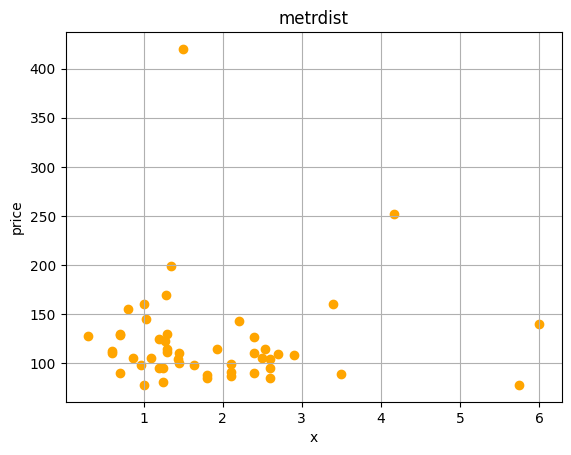

In [ ]:
selection_data1 = data.sample(50)
plt.scatter(selection_data1["rel_mc"], selection_data1["price"], color = "orange")
plt.xlabel("x")
plt.ylabel("price")
plt.title("metrdist")
plt.grid(True)
plt.show()

Ну вроде выглядит немного лучше

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis = 1), data[target], test_size=0.3, random_state=7)

a = model(X_train, y_train)
a

array([-23.22188162,   1.82647534,   1.25288208,   0.47360681,
        -3.43202432,  -1.10547621,   0.73545558])

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
msqe(X_test, a, y_test)

712.5974119312928

ну это уже другое дело)

### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Думаю... Ну вообще скорее всего для того, чтобы модель не переобучилась, только поэтому справедливо что-то делать не на трейне

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [ ]:
  def findAAAArgl(X_train, y_train, reg):
    a = X_train.shape
    X_train = np.concatenate((np.ones((a[0], 1)), X_train.reshape(a[0], a[1])), axis = 1)
    y_train_mod = (y_train).reshape(len(y_train), 1)
    temp_arg1 = np.dot(X_train.T, X_train)
    temp_arg2 = np.linalg.inv(temp_arg1 + reg * np.eye(temp_arg1.shape[0]))
    temp_arg3 = np.dot(temp_arg2, X_train.T)
    a = np.dot(temp_arg3, y_train_mod)

    return a

def msereg(X, target, a):
  mse = 0
  for i in range(0, len(X)):
    mse += (sum(X[i] * a[1]) + a[0] - target[i])**2


  return mse/len(X)

XXtk = XXtr[:, 1:7]
XXts = XXts[:, 1:7]
X_train, X_valid, y_train, y_valid = train_test_split(XXtk, YYtr, test_size=0.2, random_state=13)

IndentationError: expected an indented block after function definition on line 12 (<ipython-input-1-b4383b9ee19d>, line 13)

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.


In [ ]:
#Для степени: 6 Ошибка на тесте: 20.219189871235777 ; 0.15 для трейна

arg = []
for i in range(1, 100):
  k = i/100
  kf = findAAAArgl(X_valid, y_valid, k)

  arg.append([msereg(XXts, YYts, kf), msereg(X_train, y_train, kf), k])



In [ ]:
arg.sort()
arg[0] #ну если это правда такие числа, то я в шоке, но помойму я что-то не так сделал, но тем не менее линейкой в начале было эфективнее, там значен я куда приятнее даже этих

[array([1.63184978]), array([2.05275082]), 0.99]

lambda = 0.99

**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

Определитель X^TX представляет собой объем n-мерного многогранника, ограниченного столбцами матрицы X. При добавлении положительной константы lambda к диагональным элементам X^TX, каждое измерение этого многогранника увеличивается на lambda. Так как исходный многогранник имеет положительный объем, то и увеличение объема на положительную константу lambda^n приводит к положительному объему для X^TX + lambda "*" E . Следовательно, определитель X^TX + lambda "*" E  больше нуля при lambda > 0.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

In [ ]:
np.random.seed(0)
X = np.linspace(-1, 1, 100)
y_true = X**6 - X**5 - X**4 + X**3 - 2*X**2 + 2*X + 1 + np.random.normal(0, 5, size=X.shape)
X_poly = np.column_stack([X**i for i in range(7)])

lmbda = 0.1
I = np.eye(7)
I[0, 0] = 0
coefficients_reg = np.linalg.inv(X_poly.T @ X_poly + lmbda * I) @ X_poly.T @ y_true
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_true

plt.figure(figsize=(10, 6))
plt.scatter(X, y_true, label='Таргет')
plt.plot(X, X_poly @ coefficients, label='Модель без регуляризации', color='orange')
plt.plot(X, X_poly @ coefficients_reg, label='Модель с регуляризацией', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Приближение неизвестной функции 6-й степени')
plt.legend()
plt.grid(True)
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

1й график быстрее приспосабливается к данным, но это и минус, поскольку просто переобучить его

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

Чтобы решить эту задачу, мы можем использовать теорему Каруша-Куна-Таккера (ККТ), которая предоставляет необходимые и достаточные условия оптимальности для задач с ограничениями в виде равенств и неравенств.
**Количество решений**: Так как у нас есть равенство \( rk(X) = k \), и \( X \) имеет полный ранг, то есть решение \( a \), удовлетворяющее ограничению \( rk(X) = k \), и это решение единственно.
Таким образом, мы можем решить данную задачу, вычислив градиент функции \( f(a) \) и решив соответствующую систему уравнений. Отметим также, что в случае данной задачи, когда \( X \) имеет полный ранг, оптимальное значение \( a \) может быть найдено аналитически.$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

Константыне признаки работают, как смещение, они точно не виноваты в переобучении модели поскольку точно так же практически константно влияют на результат

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

Я пока прикола не понял, но $X^T_{(t+1)}X_{(t+1)}$ = $X^T_{(t)}X_{(t)}$ +$x_{(t+1)}^Tx_{(t+1)}$ - сложность О(1)
$X^T_{(t+1)}y_{(t+1)}$ = $X^T_{(t)}X_{(t)}$ +$x_{(t+1)}^Ty_{(t+1)}$ - сложность О(1)

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

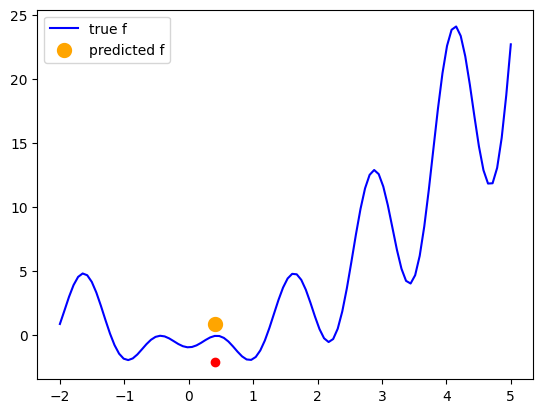

0.18827127130532673 0.1787945012005944
8.11855829519526 16.134695992692233
1.7530945958730375 9.670319921955494
-3.3627585112307385 -0.04040485381292794
1.0729130689633073 0.06713005951375195
-1.0151411637577779 0.19377950103816416
13.270446471473756 29.77699715905402
-0.3421954639653746 2.555848712223295
14.828357018337698 29.067996217725632
-2.5572944017683534 -0.2266218734892207


In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
#x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

data1 = pd.DataFrame()
data1["x"] = []
data1["x^2"] = []
data1["y"] = []
we = [1, 1]
for i in range(200):
    x_new = np.random.uniform(-2, 5)

    y_new = f_true(x_new) + 2*np.random.randn()
    x1 = x_new
    x2 = x_new**2
    data1 = data1.append({"x" : x_new, "x^2": (x_new**2), "y": y_new}, ignore_index=True)
    y_pred = x1 * we[0] + x2*we[1]
    e = y_pred - y_new
    g = np.dot(data1.drop(["y"], axis = 1).to_numpy(), e) / len(data1)
    we-=g[0]

    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')


        plt.scatter(x_new, y_pred, color='orange', linewidth=5, label='predicted f')

        plt.legend(loc='upper left')
        plt.show()

for i in range(10):
  x_new = np.random.uniform(-2, 5)

  y_new = f_true(x_new) + 2*np.random.randn()
  x1 = x_new
  x2 = x_new**2
  print(y_new, x1*we[0] + x2*we[0])

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.